In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
rcParams["figure.figsize"] = (10,8)
#plt.style.use("science")
import eispac
from glob import glob
import sunpy

In [3]:
data_filenames = glob("../src/level1/*.data.h5")
data_filenames = sorted(data_filenames)
data_filenames

['../src/level1/eis_20070331_113427.data.h5',
 '../src/level1/eis_20070331_121143.data.h5',
 '../src/level1/eis_20070331_124913.data.h5',
 '../src/level1/eis_20070331_132643.data.h5',
 '../src/level1/eis_20070331_153013.data.h5',
 '../src/level1/eis_20070331_160743.data.h5',
 '../src/level1/eis_20070331_164513.data.h5',
 '../src/level1/eis_20070331_172243.data.h5',
 '../src/level1/eis_20070331_182413.data.h5',
 '../src/level1/eis_20070331_190143.data.h5',
 '../src/level1/eis_20070331_195513.data.h5',
 '../src/level1/eis_20070331_203243.data.h5',
 '../src/level1/eis_20070331_213213.data.h5',
 '../src/level1/eis_20070331_220943.data.h5',
 '../src/level1/eis_20070331_230743.data.h5']

In [4]:
data_cube_0 = eispac.read_cube(data_filenames[4],0)
data_cube_1 = eispac.read_cube(data_filenames[4],1)
data_cube_2 = eispac.read_cube(data_filenames[4],2)
data_cube_3 = eispac.read_cube(data_filenames[4],3)

Data file,
   /home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.data.h5
Header file,
   /home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.head.h5
Found window 0
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   /home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.data.h5
Header file,
   /home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.head.h5
Found window 1
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   /home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.data.h5
Header file,
   /home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.head.h5
Found window 2
INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
Data file,
   /home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.data.h5
Header file,
   /home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.head.h5
Found window 3
INFO: uncertainty shou

In [32]:
data_cube_0_smooth = data_cube_0.smooth_cube(width=2)

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]


(512, 7, 1024)

/tmp/ipykernel_311875/757972771.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(data_cube_1.data[:,0,0:200]),aspect=0.5)
/tmp/ipykernel_311875/757972771.py:1: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data_cube_1.data[:,0,0:200]),aspect=0.5)


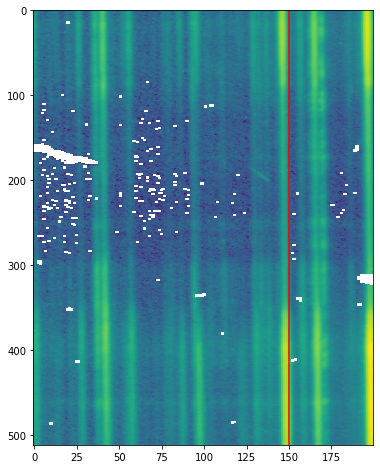

In [45]:
plt.imshow(np.log10(data_cube_1.data[:,0,0:200]),aspect=0.5)
plt.axvline(150,color="red")

In [5]:
fe_12_195_tmplt = eispac.read_template("./fit_template/fe_12_195_119.1c.template.h5")
fe_12_195_fit_res = eispac.fit_spectra(data_cube_1, fe_12_195_tmplt, ncpu="max")
fe_12_195_fit, fe_12_195_fit_err = fe_12_195_fit_res.get_params()


 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:02.486472
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


In [6]:
fe_10_184_tmplt = eispac.read_template("./fit_template/fe_10_184_536.1c.template.h5")
fe_10_184_fit_res = eispac.fit_spectra(data_cube_0, fe_10_184_tmplt, ncpu="max")
fe_10_184_fit, fe_10_184_fit_err = fe_10_184_fit_res.get_params()


 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:02.391477
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


In [53]:
fe_10_184_fit_res.meta

{'filename_data': '/home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.data.h5',
 'filename_head': '/home/yjzhu/SOLAR/EIS_PCH_NRL/src/level1/eis_20070331_153013.head.h5',
 'wininfo': rec.array([(0, 'FE X 177.720', 166.30032, 189.11714, 1024,   50),
            (1, 'FE XII 195.120', 189.13942, 211.92967, 1024, 1074),
            (2, 'HE II 256.320', 245.79779, 268.57382, 1024, 2198),
            (3, 'FE XV 284.160', 268.59607, 291.3442 , 1024, 3222)],
           dtype=[('iwin', '<i4'), ('line_id', '<U64'), ('wvl_min', '<f4'), ('wvl_max', '<f4'), ('nl', '<i4'), ('xs', '<i4')]),
 'iwin': 0,
 'iwin_str': 'win00',
 'index': {'achf_ver': 1,
  'asrcdir': 0,
  'asrcnr': 0,
  'asrcskip': 0,
  'bitc_ver': 7,
  'bitpix': 8,
  'cal_abs': 0,
  'cal_cr': 0,
  'cal_dc': 0,
  'cal_ff': 0,
  'cal_wvl': 0,
  'ccdxl': 2148,
  'ccsds_en': '2007-03-31T16:06:15.000',
  'ccsds_ob': '2007-03-31T15:35:20.000',
  'ccsds_ti': 527883078,
  'cdelt1': 1.9968,
  'cdelt2': 1.0,
  'cdelt3': 0.0223,
  'cmirr':

In [7]:
fe_10_257_tmplt = eispac.read_template("./fit_template/fe_10_257_262.4c.template.h5")
fe_10_257_fit_res = eispac.fit_spectra(data_cube_2, fe_10_257_tmplt, ncpu="max")
fe_10_257_fit, fe_10_257_fit_err = fe_10_257_fit_res.get_params(1)


 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:16.188676
   3584 spectra fit without issues
   0 spectra have < 13 good data points
   0 spectra have bad or invalid parameters


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


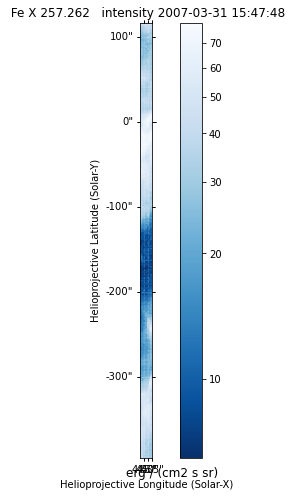

In [8]:
fe_10_257_fit_map = fe_10_257_fit_res.get_map(1,"intensity")
fe_10_257_fit_map.peek()

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


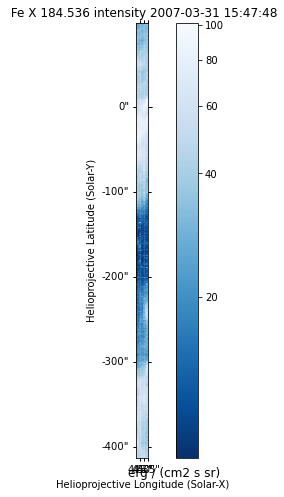

In [12]:
fe_10_184_fit_map = fe_10_184_fit_res.get_map(0,"intensity")
fe_10_184_fit_map.peek()

INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


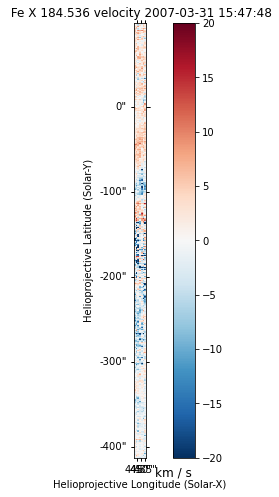

In [15]:
fe_10_184_fit_vel_map = fe_10_184_fit_res.get_map(0,"vel")
fe_10_184_fit_vel_map.peek()

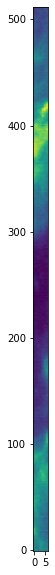

In [9]:
fig, ax = plt.subplots(figsize=(3,10))
ax.imshow(fe_10_184_fit[:,:,0],origin="lower",aspect=0.5)

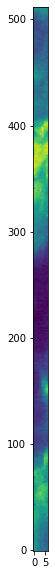

In [10]:
fig, ax = plt.subplots(figsize=(3,10))
ax.imshow(fe_10_257_fit[:,:,0],origin="lower",aspect=0.5)

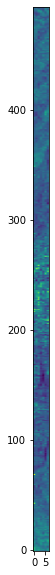

In [14]:
fig, ax = plt.subplots(figsize=(3,10))
ax.imshow(fe_10_184_fit[18:,:,0]/fe_10_257_fit[:-18,:,0],origin="lower",aspect=0.5)

In [17]:
mg_7_276_tmplt = eispac.read_template("./fit_template/mg_07_276_153.1c.template.h5")
mg_7_276_fit_res = eispac.fit_spectra(data_cube_3, mg_7_276_tmplt, ncpu="max")
mg_7_276_fit, mg_7_276_fit_err = mg_7_276_fit_res.get_params()


 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:04.363468
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


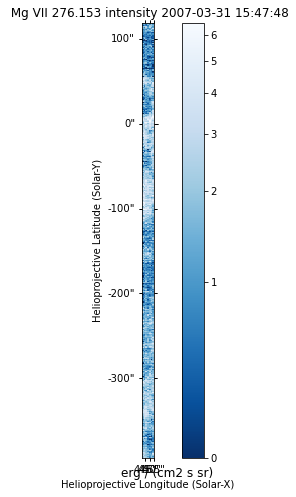

In [18]:
mg_7_276_fit_map = mg_7_276_fit_res.get_map(0,"intensity")
mg_7_276_fit_map.peek()

In [21]:
mg_7_280_tmplt = eispac.read_template("./fit_template/mg_07_280_737.1c.template.h5")
mg_7_280_fit_res = eispac.fit_spectra(data_cube_3, mg_7_280_tmplt, ncpu="max")
mg_7_280_fit, mg_7_280_fit_err = mg_7_280_fit_res.get_params()


 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:05.105868
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


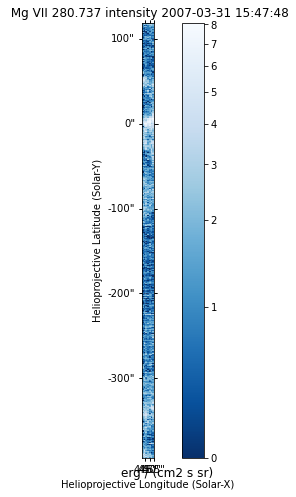

In [24]:
mg_7_280_fit_map = mg_7_280_fit_res.get_map(0,"intensity")
mg_7_280_fit_map.peek()

/tmp/ipykernel_311875/1202370986.py:2: RuntimeWarning: divide by zero encountered in true_divide
  ax.imshow(mg_7_276_fit[:,:,0]/mg_7_280_fit[:,:,0],origin="lower",aspect=0.5,vmin=0.22,vmax=2.7)
/tmp/ipykernel_311875/1202370986.py:2: RuntimeWarning: invalid value encountered in true_divide
  ax.imshow(mg_7_276_fit[:,:,0]/mg_7_280_fit[:,:,0],origin="lower",aspect=0.5,vmin=0.22,vmax=2.7)


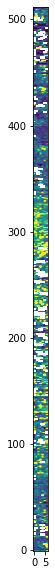

In [23]:
fig, ax = plt.subplots(figsize=(3,10))
ax.imshow(mg_7_276_fit[:,:,0]/mg_7_280_fit[:,:,0],origin="lower",aspect=0.5,vmin=0.22,vmax=2.7)

In [46]:
si_10_258_tmplt = eispac.read_template("./fit_template/si_10_258_375.1c.template.h5")
si_10_258_fit_res = eispac.fit_spectra(data_cube_2, si_10_258_tmplt, ncpu="max")
si_10_258_fit, si_10_258_fit_err = si_10_258_fit_res.get_params()


 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:02.844121
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


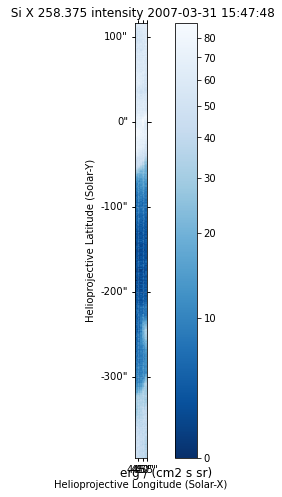

In [47]:
si_10_258_fit_map = si_10_258_fit_res.get_map(0,"intensity")
si_10_258_fit_map.peek()

In [49]:
si_10_261_tmplt = eispac.read_template("./fit_template/si_10_261_058.1c.template.h5")
si_10_261_fit_res = eispac.fit_spectra(data_cube_2, si_10_261_tmplt, ncpu="max")
si_10_261_fit, si_10_261_fit_err = si_10_261_fit_res.get_params()


 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:02.801590
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


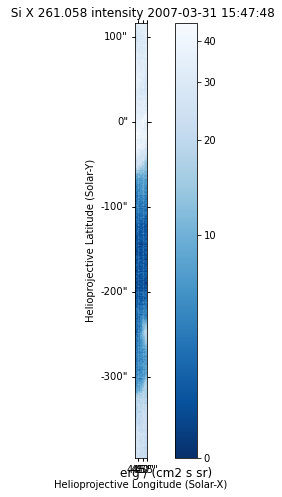

In [50]:
si_10_261_fit_map = si_10_261_fit_res.get_map(0,"intensity")
si_10_261_fit_map.peek()

In [55]:
fe_8_185_tmplt = eispac.read_template("./fit_template/fe_08_185_213.1c.template.h5")
fe_8_185_fit_res = eispac.fit_spectra(data_cube_0, fe_8_185_tmplt, ncpu="max")
fe_8_185_fit, fe_8_185_fit_err = fe_8_185_fit_res.get_params()

 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:02.803904
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


In [56]:
fe_8_186_tmplt = eispac.read_template("./fit_template/fe_08_186_601.1c.template.h5")
fe_8_186_fit_res = eispac.fit_spectra(data_cube_0, fe_8_186_tmplt, ncpu="max")
fe_8_186_fit, fe_8_186_fit_err = fe_8_186_fit_res.get_params()

 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:02.825983
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


In [58]:
he_2_256_tmplt = eispac.read_template("./fit_template/he_02_256_317.2c.template.h5")
he_2_256_fit_res = eispac.fit_spectra(data_cube_2, he_2_256_tmplt, ncpu="max")
he_2_256_fit, he_2_256_fit_err = he_2_256_fit_res.get_params()

 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:13.143280
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


In [59]:
fe_9_197_tmplt = eispac.read_template("./fit_template/fe_09_197_862.1c.template.h5")
fe_9_197_fit_res = eispac.fit_spectra(data_cube_1, fe_9_197_tmplt, ncpu="max")
fe_9_197_fit, fe_9_197_fit_err = fe_9_197_fit_res.get_params()

 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:02.693415
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


In [60]:
o_6_184_tmplt = eispac.read_template("./fit_template/o__06_184_117.1c.template.h5")
o_6_184_fit_res = eispac.fit_spectra(data_cube_0, o_6_184_tmplt, ncpu="max")
o_6_184_fit, o_6_184_fit_err = o_6_184_fit_res.get_params()

 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:03.726269
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


In [61]:
fe_11_188_tmplt = eispac.read_template("./fit_template/fe_11_188_216.2c.template.h5")
fe_11_188_fit_res = eispac.fit_spectra(data_cube_0, fe_11_188_tmplt, ncpu="max")
fe_11_188_fit, fe_11_188_fit_err = fe_11_188_fit_res.get_params()

 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:04.992948
   3511 spectra fit without issues
   73 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


/home/yjzhu/anaconda3/lib/python3.8/site-packages/eispac/core/fit_spectra.py:423: RuntimeWarning: invalid value encountered in true_divide
  rel_err = obs_errs/obs_cent


In [64]:
fe_14_270_tmplt = eispac.read_template("./fit_template/fe_14_270_519.2c.template.h5")
fe_14_270_fit_res = eispac.fit_spectra(data_cube_3, fe_14_270_tmplt, ncpu="max")
fe_14_270_fit, fe_14_270_fit_err = fe_14_270_fit_res.get_params()

 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:07.263924
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


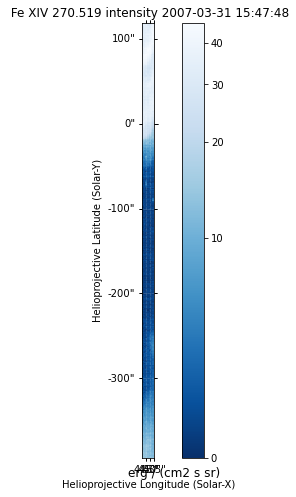

In [67]:
fe_14_270_fit_map = fe_14_270_fit_res.get_map(1,"intensity")
fe_14_270_fit_map.peek()

In [68]:
fe_15_284_tmplt = eispac.read_template("./fit_template/fe_15_284_160.2c.template.h5")
fe_15_284_fit_res = eispac.fit_spectra(data_cube_3, fe_15_284_tmplt, ncpu="max")
fe_15_284_fit, fe_15_284_fit_err = fe_15_284_fit_res.get_params()

 + computing fits for 7 exposures, each with 512 spectra
 + running mpfit on 7 cores (of 12)


Finished computing fits!
   runtime : 0:00:08.622070
   3584 spectra fit without issues
   0 spectra have < 7 good data points
   0 spectra have bad or invalid parameters


INFO: uncertainty should have attribute uncertainty_type. [astropy.nddata.nddata]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


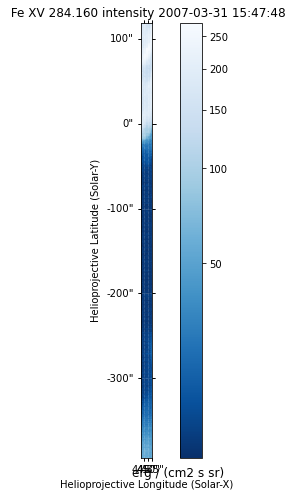

In [69]:
fe_15_284_fit_map = fe_15_284_fit_res.get_map(1,"intensity")
fe_15_284_fit_map.peek()